# Abstract
Este proyecto se sumerge en el mercado de alquileres temporales de Airbnb en Nueva York, utilizando el dataset público "Airbnb_Open_Dataset Oficial.csv". El objetivo principal es desarrollar y evaluar un modelo de Machine Learning capaz de predecir el precio por noche de un alojamiento, identificando los factores más influyentes para sus tarifas. Tras un riguroso pipeline de limpieza de datos, análisis exploratorio (EDA) e ingeniería de características (donde se crearon múltiples nuevas variables, incluyendo la antigüedad de la propiedad, presencia de cocina, WiFi y servicios clave), se entrenaron dos modelos de regresión.

El modelo final, un **RandomForestRegressor**, logró un coeficiente de determinación (**R² = 0.346**), superando drásticamente a un modelo lineal de base (**R² ≈ 0**). El análisis de importancia de características reveló que la **ubicación geográfica (lat, long)** y la **disponibilidad anual** son los predictores más potentes, seguidos por `number of reviews` y `antiguedad_propiedad`. El proyecto concluye que, si bien el modelo actual proporciona una herramienta valiosa para la estimación de precios, la precisión podría mejorarse enriqueciendo el dataset con información adicional sobre la calidad de la propiedad y servicios específicos.

---

# Objetivo del Proyecto
En el competitivo mercado de Airbnb, principalmente en Nueva York, fijar un precio óptimo es un desafío crucial tanto para anfitriones, que buscan maximizar su rentabilidad, como para huéspedes, que desean evaluar si una tarifa es justa. El problema central es la **falta de una referencia de precios objetiva**.

Por lo tanto, el objetivo de este proyecto es construir un modelo de regresión que prediga el precio de un alojamiento en Nueva York, sirviendo como base para:

- Ayudar a los anfitriones a posicionar sus propiedades con un precio competitivo.
- Permitir a los huéspedes evaluar si el precio de un listado es adecuado.
- Identificar y cuantificar los atributos de una propiedad que tienen el mayor impacto en su valor.

---

# Hipótesis
Se aborda este problema mediante un enfoque de aprendizaje supervisado, específicamente una tarea de regresión, utilizando `price` como variable objetivo. El análisis se guió por las siguientes hipótesis, evaluadas tanto en el EDA como con los resultados del modelo final:

1. **Hipótesis de Ubicación:** El distrito (`distritos`) y la ubicación exacta (`lat`, `long`) son los factores más determinantes en la variación de los precios.  
   **Resultado:** Confirmada. El análisis de importancia de características del Random Forest posicionó a `lat` y `long` como las variables más influyentes.

2. **Hipótesis de Tipo de Propiedad:** El tipo de habitación (`room_type`) tiene un impacto significativo y directo sobre el precio.  
   **Resultado:** Confirmada. Ser una "habitación privada" (`room_type_Private room`) se encuentra entre las 10 características más importantes para el modelo.

3. **Hipótesis de Valor Añadido:** La creación de nuevas características mejorará la precisión predictiva.  
   **Resultado:** Confirmada. Variables como `antiguedad_propiedad`, `tiene_cocina` y `instant_bookable_True` se posicionaron entre las más relevantes, demostrando el valor de enriquecer los datos.

---



# *1. Librerías*

In [1]:
# 1. Configuración de las Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1. Librerías de Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# 1.2. Configuración de visualizaciones
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("1. Librerías cargadas exitosamente")

1. Librerías cargadas exitosamente


# Justificación de la Configuración del Entorno

Para desarrollar este proyecto de Ciencia de Datos se configuró un entorno con librerías especializadas de Python, cubriendo todo el ciclo de vida del modelo: desde la carga y limpieza de datos hasta la evaluación e interpretación de resultados.

## Librerías Fundamentales

- **Pandas:** Base del análisis y manipulación de datos. Permite limpiar, transformar y estructurar la información en DataFrames.
- **NumPy:** Soporte para operaciones matemáticas y manejo eficiente de arrays numéricos utilizados por Scikit-Learn.

## Visualización de Datos

- **Matplotlib y Seaborn:** Usadas en el Análisis Exploratorio (EDA) para representar la distribución de variables y detectar patrones.  
  Se configura el tema `whitegrid` y un tamaño de figura uniforme para mantener la coherencia visual.

## Machine Learning – Scikit-Learn

El modelado se realiza mediante **Pipelines**, asegurando un flujo reproducible y evitando fugas de datos.

- **ColumnTransformer:** Aplica transformaciones específicas a columnas numéricas y categóricas.  
- **StandardScaler:** Normaliza las variables numéricas (media 0, desviación estándar 1).  
- **OneHotEncoder:** Codifica variables categóricas sin introducir orden artificial.  
- **Pipeline:** Integra preprocesamiento y modelado en una sola estructura.  
- **LinearRegression:** Modelo baseline para establecer una referencia inicial.  
- **RandomForestRegressor:** Modelo principal, robusto ante sobreajuste y capaz de capturar relaciones no lineales.  
- **GridSearchCV:** Optimización sistemática de hiperparámetros.  
- **Métricas (R², MAE, RMSE):** Evalúan el rendimiento y precisión del modelo.

## Interpretabilidad del Modelo

- **SHAP (SHapley Additive exPlanations):** Permite interpretar la influencia de cada variable sobre las predicciones, aportando transparencia y confianza al modelo final.

---

Esta configuración integral garantiza un flujo de trabajo robusto, reproducible y explicable, cumpliendo con las buenas prácticas de la industria en proyectos de Ciencia de Datos.


#  **2. Carga y Exploración Inicial de Datos**

In [2]:
# Carga y Exploración Inicial de Datos

# URL del dataset en GitHub
url = 'https://raw.githubusercontent.com/IturryCamila/Data-Science-Camila-Iturry/refs/heads/main/Airbnb_Open_Data.csv'

# DATAFRAME
try:
    df = pd.read_csv(url, low_memory=False, sep=',') # Changed sep=';' to sep=','
    print("\n✓ DataFrame creado exitosamente desde GitHub")
except Exception as e:
    print(f"\nX Error al crear el DataFrame desde GitHub: {e}")
    raise

# INFORMACION GENERAL DEL DATASET
print("\n INFORMACIÓN GENERAL")
print(f"Registros: {df.shape[0]:,}")
print(f"Columnas: {df.shape[1]}")

print("\n ESTRUCTURA DEL DATASET")
df.info()

# PRIMEROS DATOS
print("\n PRIMERAS 5 FILAS")
display(df.head())


✓ DataFrame creado exitosamente desde GitHub

 INFORMACIÓN GENERAL
Registros: 102,599
Columnas: 26

 ESTRUCTURA DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code   

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# Carga y Exploración Inicial de Datos

En esta sección se realiza la **importación del dataset original** alojado en GitHub y una **revisión general de su estructura**. Este paso es fundamental dentro del flujo de trabajo, ya que garantiza la trazabilidad y reproducibilidad del análisis.

## Carga del Dataset

El dataset se obtiene directamente desde un repositorio de GitHub mediante la librería **Pandas**, utilizando la función `read_csv()` con el parámetro `low_memory=False` para optimizar la lectura de grandes volúmenes de datos.  
El bloque `try-except` permite controlar errores de conexión o lectura, mostrando mensajes claros en caso de fallo.


# **3. Limpieza y Preprocesamiento de Datos.**

In [3]:
#INSPECCIÓN Y LIMPIEZA INICIAL

print("="*70)
print("INSPECCIÓN Y LIMPIEZA INICIAL".center(70,"="))
print("="*70)

# NULOS

nulos_totales = df.isna().sum().sum()
print(f"Total de nulos: {nulos_totales:,}")
print(f"Porcentaje de nulos: {nulos_totales/df.size*100:.2f}%")

#COLUMNAS

print("\nNULOS POR COLUMNA")
nulos_por_columna = pd.DataFrame({
    'Nulos': df.isna().sum(),
    'Porcentaje': (df.isna().sum()/df.shape[0]*100).round(2)
})
display(nulos_por_columna)

# COLUMNAS CRITICAS

columnas_criticas = nulos_por_columna[nulos_por_columna['Porcentaje'] > 40].index
if len(columnas_criticas) > 0:
  print(f"\nCOLUMNAS CRITICAS (>40% nulos): {list(columnas_criticas)}")
  print("Considerar eliminar ")

# LIMPIZA DE COLUMNAS INNECESARIAS

print("\nEliminación de columnas innecesarias")

#COLUMNAS CON MAS DEL 95% DE LOS NULOS

umbral_eliminacion = 95
columnas_a_eliminar = nulos_por_columna[nulos_por_columna['Porcentaje'] > umbral_eliminacion].index.tolist()

if len(columnas_a_eliminar) > 0:
  print(f"\nColumnas con mas del {umbral_eliminacion}% de nulos: {columnas_a_eliminar}")

  df.drop(columns=columnas_a_eliminar, inplace=True)

  print(f"\nColumnas eliminadas: {columnas_a_eliminar}")

else:
  print(f"\nNo se encontraron columnas con mas del {umbral_eliminacion}% de nulos.")


# DIMENSIONES FINALES DEL DATASET:

print(f"\nDimensiones finales del dataset: {df.shape[0]:,} registros x {df.shape[1]:,} columnas")
print("\nColumnas restantes:")
print(df.columns.tolist())

# DUPLICADOS

print("="*70)
print("ANÁLISIS DE DUPLICADOS".center(70,"="))
print("="*70)
num_duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {num_duplicados} ({100*num_duplicados/len(df):.2f}%)")

# MOSTRAR DUPLICADOS

print("\nMostrar las prmuras 5 filas duplicadas")
display(df[df.duplicated()].head())

print(f"Forma del DataFrame antes de eliminar duplicados: {df.shape}")
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True) # Buena práctica después de eliminar filas
print(f"Forma del DataFrame después de eliminar duplicados: {df.shape}")


====================INSPECCIÓN Y LIMPIEZA INICIAL=====================
Total de nulos: 190,769
Porcentaje de nulos: 7.15%

NULOS POR COLUMNA


,Nulos,Porcentaje
id,0,0.00
NAME,250,0.24
host id,0,0.00
host_identity_verified,289,0.28
host name,406,0.40
neighbourhood group,29,0.03
neighbourhood,16,0.02
lat,8,0.01
long,8,0.01
country,532,0.52



COLUMNAS CRITICAS (>40% nulos): ['house_rules', 'license']
Considerar eliminar 

Eliminación de columnas innecesarias

Columnas con mas del 95% de nulos: ['license']

Columnas eliminadas: ['license']

Dimensiones finales del dataset: 102,599 registros x 25 columnas

Columnas restantes:
['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules']
========================ANÁLISIS DE DUPLICADOS========================
Filas duplicadas encontradas: 541 (0.53%)

Mostrar las prmuras 5 filas duplicadas


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$706,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$651,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$907,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$589,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$356,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN


Forma del DataFrame antes de eliminar duplicados: (102599, 25)
Forma del DataFrame después de eliminar duplicados: (102058, 25)


# Inspección y Limpieza Inicial

En esta etapa se realiza un **análisis de calidad de los datos** con el objetivo de identificar y corregir posibles problemas que puedan afectar el modelado.

## Identificación de Valores Nulos

Se contabilizan los nulos totales y por columna para detectar variables con información incompleta.  
- Total de nulos en el dataset: 190.769 (7,15%)  
- Columnas críticas (>40% de nulos): `house_rules` y `license`

Se toma la decisión de **eliminar columnas irrelevantes o con alto porcentaje de nulos** (por ejemplo, `license` con 100% nulos).

## Eliminación de Columnas Innecesarias

Se eliminan columnas cuya información es mayoritariamente ausente o no aporta valor al análisis, manteniendo la integridad de las variables más relevantes.

- Columnas eliminadas: `license`  
- Dimensiones finales del dataset: 102.599 registros x 25 columnas

## Detección y Eliminación de Filas Duplicadas

Se identifican y eliminan duplicados para garantizar que cada registro sea único y no introduzca sesgo en el modelo.

- Filas duplicadas detectadas: 541 (0,53%)  
- Forma del DataFrame después de la limpieza: 102.058 registros x 25 columnas



In [4]:
# IMPUTACIONES Y CORRECCIONES (VERSIÓN CORREGIDA Y OPTIMIZADA)

print("="*70)
print("IMPUTACIÓN DE VALORES FALTANTES".center(70,"="))
print("="*70)

# CREACIÓN DE UNA COLUMNA GEOGRÁFICA LIMPIA ('distritos')
print("\nCreando columna 'distritos'")

correcciones = {'Brookln': 'Brooklyn', 'Manhatan': 'Manhattan'}
df['neighbourhood group'] = df['neighbourhood group'].replace(correcciones)
print("Errores tipográficos en 'neighbourhood group' corregidos.")

df = df[df['neighbourhood group'] != 'Unspecified'].copy()
print("Filas con 'Unspecified' eliminadas.")

# MAPA
distritos_validos = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
df_confiable = df[df['neighbourhood group'].isin(distritos_validos)]
mapa_barrio_a_distrito = df_confiable.drop_duplicates(subset='neighbourhood').set_index('neighbourhood')['neighbourhood group'].to_dict() # Corrected column name here
print("Mapa de referencia Barrio -> Distrito creado.")

# DEFINIR CORRECCIÓN
def corregir_distrito(row):
  distrito_actual = row['neighbourhood group']
  barrio_actual = row['neighbourhood']

  # Regla 1: Si el distrito ya es válido, es la mejor fuente.
  if distrito_actual in distritos_validos:
    return distrito_actual
  # Regla 2: Si no, intenta usar el mapa de barrios para encontrar el distrito.
  if barrio_actual in mapa_barrio_a_distrito:
    return mapa_barrio_a_distrito[barrio_actual]
  # Regla 3: Si nada funciona, es 'Desconocido'.
  return 'Desconocido'

# COLUMNA FINAL DISTRITOS
df['distritos'] = df.apply(corregir_distrito, axis=1)
print("Columna 'distritos' creada y verificada.")
print(df['distritos'].value_counts())

# CONVERSIÓN DE TIPOS DE DATOS Y LIMPIEZA DE FORMATO
print("\nConvirtiendo columnas a tipo numérico")

# Limpieza de columnas monetarias
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
print("'price' y 'service fee' limpiadas y convertidas a numérico.")

# Conversión de otras columnas numéricas
for col in ['Construction year', 'minimum nights', 'availability 365']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
print("Otras columnas numéricas convertidas con 'coerce'.")

# IMPUTACIÓN DE VALORES NULOS
print("\nImputando valores nulos")

# Imputación basada en lógica de negocio
df['reviews per month'] = df['reviews per month'].fillna(0)
df['number of reviews'] = df['number of reviews'].fillna(0)
df['review rate number'] = df['review rate number'].fillna(0)
df['calculated host listings count'] = df['calculated host listings count'].fillna(0)
df['minimum nights'] = df['minimum nights'].fillna(1)
df['availability 365'] = df['availability 365'].fillna(0)
print("Imputación con lógica de negocio completada.")

# Imputación con medidas estadísticas
df['Construction year'] = df['Construction year'].fillna(df['Construction year'].mode()[0])
print("'Construction year' imputado con la moda.")

# Imputación contextual
for col in ['lat', 'long', 'price', 'service fee']:
    if col in df.columns:
        df[col] = df.groupby('distritos')[col].transform(lambda x: x.fillna(x.median()))
        df[col] = df[col].fillna(df[col].median())
print("Imputación para coordenadas y precios completada.")
columnas_categoricas_restantes = df.select_dtypes(include=['object']).columns

for col in columnas_categoricas_restantes:
    if df[col].isna().sum() > 0:
        if 'review' in col:
             df[col] = df[col].fillna('No Review')
        elif 'name' in col:
             df[col] = df[col].fillna('Unnamed')
        elif 'verified' in col:
             df[col] = df[col].fillna('unconfirmed')
        else:
             df[col] = df[col].fillna('Unspecified')

print("Imputación de categóricas completada.")

print("\nProceso de Imputación y Correcciones finalizado.")

# Imputación específica para 'house_rules'
if 'house_rules' in df.columns:
    df['house_rules'] = df['house_rules'].fillna('')
    print("'house_rules' imputado con texto vacío para los nulos.")

# VERIFICACIÓN FINAL
print("\nVerificación Final Post-Imputación")
nulos_restantes = df.isna().sum().sum()
print(f"Datos nulos restantes: {nulos_restantes}")

if nulos_restantes > 0:
    print("\nColumnas con nulos restantes:")
    print(df.isna().sum()[df.isna().sum() > 0])
else:
    print("\nNo quedan valores nulos en el dataset.")

===================IMPUTACIÓN DE VALORES FALTANTES====================

Creando columna 'distritos'
Errores tipográficos en 'neighbourhood group' corregidos.
Filas con 'Unspecified' eliminadas.
Mapa de referencia Barrio -> Distrito creado.
Columna 'distritos' creada y verificada.
distritos
Manhattan        43571
Brooklyn         41644
Queens           13199
Bronx             2695
Staten Island      949
Name: count, dtype: int64

Convirtiendo columnas a tipo numérico
'price' y 'service fee' limpiadas y convertidas a numérico.
Otras columnas numéricas convertidas con 'coerce'.

Imputando valores nulos
Imputación con lógica de negocio completada.
'Construction year' imputado con la moda.
Imputación para coordenadas y precios completada.
Imputación de categóricas completada.

Proceso de Imputación y Correcciones finalizado.
'house_rules' imputado con texto vacío para los nulos.

Verificación Final Post-Imputación
Datos nulos restantes: 0

No quedan valores nulos en el dataset.


# Imputación y Correcciones de Datos

En esta sección se realizan **correcciones, limpieza de formatos y imputación de valores faltantes**, siguiendo buenas prácticas de manejo de datos para asegurar consistencia y confiabilidad del dataset.

## Corrección Geográfica

- Se crean los distritos a partir de la columna `neighbourhood group`, corrigiendo errores tipográficos (`Brookln → Brooklyn`, `Manhatan → Manhattan`).  
- Se eliminan filas con valores `Unspecified`.  
- Se construye un **mapa Barrio → Distrito** para corregir registros inconsistentes, generando la columna final `distritos` con valores validados.  

Distribución de registros por distrito tras la corrección:  
- Manhattan: 43.571  
- Brooklyn: 41.644  
- Queens: 13.199  
- Bronx: 2.695  
- Staten Island: 949

## Conversión y Limpieza de Tipos

- Columnas monetarias (`price`, `service fee`) se limpian de símbolos y comas, y se convierten a tipo numérico.  
- Columnas numéricas (`Construction year`, `minimum nights`, `availability 365`) se convierten con coerción para manejar inconsistencias.

## Imputación de Valores Faltantes

- **Basada en lógica de negocio:**  
  - `reviews per month`, `number of reviews`, `review rate number`, `calculated host listings count` → 0  
  - `minimum nights` → 1  
  - `availability 365` → 0  

- **Medidas estadísticas:**  
  - `Construction year` → moda  

- **Imputación contextual por distrito:**  
  - `lat`, `long`, `price`, `service fee` → mediana por `distritos`  

- **Variables categóricas restantes:**  
  - Se imputan con valores


In [5]:
# LIMPIEZA Y ANÁLISIS TEMPORAL

print("="*70)
print("LIMPIEZA Y ANÁLISIS TEMPORAL".center(70,"="))
print("="*70)

print("\nPROCESAMIENTO DE FECHAS")

# CONVERTIR 'last review' A datetime
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# VARIABLES TEMPORALES
df['year'] = df['last review'].dt.year
df['month'] = df['last review'].dt.month

# FILTRADO

print(f"\n--- Filtrando fechas anómalas ---")
registros_antes = len(df)
print(f"Registros antes del filtro: {registros_antes:,}")

año_limite = 2025

df = df[(df['year'] <= año_limite) | (df['year'].isna())].copy()

df.reset_index(drop=True, inplace=True)

print(f"Registros eliminados con fechas futuras: {registros_antes - len(df)}")
print(f"Registros después del filtro: {len(df):,}")
print("--- Filtro completado ---\n")

# DISTRIBUCIÓN DE AÑOS
print("\nDistribución de registros por años:")
distribucion_anual = df['year'].value_counts().sort_index()
print(distribucion_anual)

print("\nPorcentaje por año:")
año_pct = (distribucion_anual / len(df) * 100).round(2)
for year, pct in año_pct.items():
    print(f"{year}: {pct:.2f}%")
# JUSTIFICACIÓN Y FILTRADO TEMPORAL
registros_antiguos = (df['year'] < 2016).sum()
print(f"\nRegistros con < 2016: {registros_antiguos}")
registros_actuales = (df['year'] > 2025).sum()
print(f"\nRegistros con > 2025: {registros_actuales}")
registros_sin_fecha = df['year'].isna().sum()
print(f"\nRegistros sin fecha de reseña: {registros_sin_fecha}")

# CALCULO DE DIAS PARA LOS QUE NO TIENEN FECHA
df['tiene_review'] = (df['number of reviews'] > 0). astype (int)

last_review_dias = df['last review'].max()
df['dias_desde_last_review'] = (last_review_dias - df['last review']).dt.days
dias_max = df['dias_desde_last_review'].max()
impute_value = dias_max + 365
df['dias_desde_last_review'] = df['dias_desde_last_review'].fillna(impute_value)

print("Vista previa de las nuevas características")
print((df[['tiene_review', 'dias_desde_last_review']]))

# REGISTROS CON RESEÑAS POR AÑO-MES
df_reviews = df[df['year'].notna()].copy()
cobertura_mensual = df_reviews.groupby(['year','month']).size()
meses_por_año = df_reviews.groupby('year')['month'].nunique()
print(f"\nTotal de registros con reseñas: {len(df_reviews):,}")
print(f"\nRegistros sin reseñas: {len(df) - len(df_reviews):,}")


=====================LIMPIEZA Y ANÁLISIS TEMPORAL=====================

PROCESAMIENTO DE FECHAS

--- Filtrando fechas anómalas ---
Registros antes del filtro: 102,058
Registros eliminados con fechas futuras: 3
Registros después del filtro: 102,055
--- Filtro completado ---


Distribución de registros por años:
year
2012.0       26
2013.0       80
2014.0      246
2015.0     1850
2016.0     4303
2017.0     6591
2018.0    11403
2019.0    42734
2020.0     2063
2021.0     6556
2022.0    10369
2024.0        1
2025.0        1
Name: count, dtype: int64

Porcentaje por año:
2012.0: 0.03%
2013.0: 0.08%
2014.0: 0.24%
2015.0: 1.81%
2016.0: 4.22%
2017.0: 6.46%
2018.0: 11.17%
2019.0: 41.87%
2020.0: 2.02%
2021.0: 6.42%
2022.0: 10.16%
2024.0: 0.00%
2025.0: 0.00%

Registros con < 2016: 2202

Registros con > 2025: 0

Registros sin fecha de reseña: 15832
Vista previa de las nuevas características
        tiene_review  dias_desde_last_review
0                  1                  1346.0
1                  

# Limpieza y Análisis Temporal

En esta sección se realiza el **procesamiento de la información temporal** contenida en la columna `last review` para generar nuevas variables que aporten valor al análisis predictivo.

## Conversión de Fechas

- Se transforma la columna `last review` a tipo `datetime` con `pd.to_datetime()`.  
- Se generan nuevas variables:  
  - `year`: año de la última reseña  
  - `month`: mes de la última reseña

## Filtrado de Fechas Anómalas

- Se eliminan registros con fechas futuras (mayores a 2025).  
- Se revisan registros antiguos (<2016) y aquellos sin fecha de reseña.  

Resultados:  
- Registros eliminados con fechas futuras: 3  
- Registros sin reseñas: 15.832  
- Registros totales con reseñas: 86.223  

## Creación de Nuevas Variables Temporales

- `tiene_review`: indicador binario de si el registro tiene al menos una reseña (1 = sí, 0 = no).  
- `dias_desde_last_review`: número de días transcurridos desde la última reseña.  
  - Para registros sin fecha, se asigna un valor representativo (`máximo de días + 365`) para mantener consistencia.

## Distribución Temporal

- La mayoría de las reseñas se concentran entre 2018 y 2019 (aprox. 53 el total).  
- Los registros antiguos (<2016) representan solo un 2,2% y pueden ser considerados como datos históricos.  
- Esta transformación permite **analizar tendencias, estacionalidad y patrones temporales** en las reseñas, información clave para modelado predictivo y análisis de comportamiento del cliente.


# **4. Análisis Exploratorio de Datos (EDA)**

=================ANÁLISIS EXPLORATORIO DE DATOS (EDA)=================

¿Dónde y qué tipo de alojamientos hay?


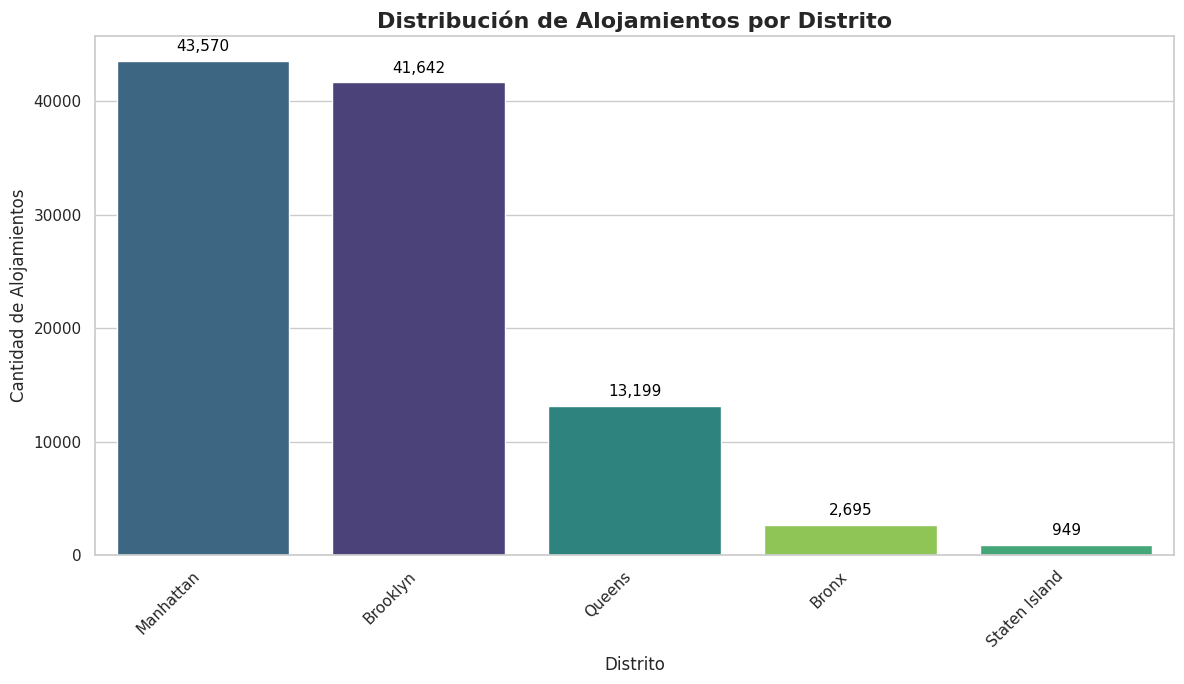


Análisis de Precios: ¿Cuánto cuestan y dónde son más caros?


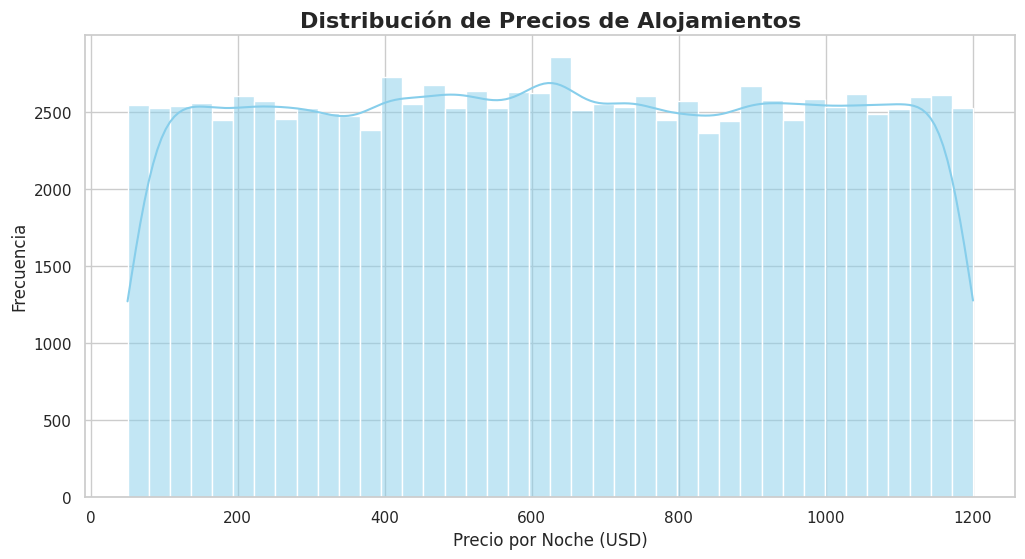

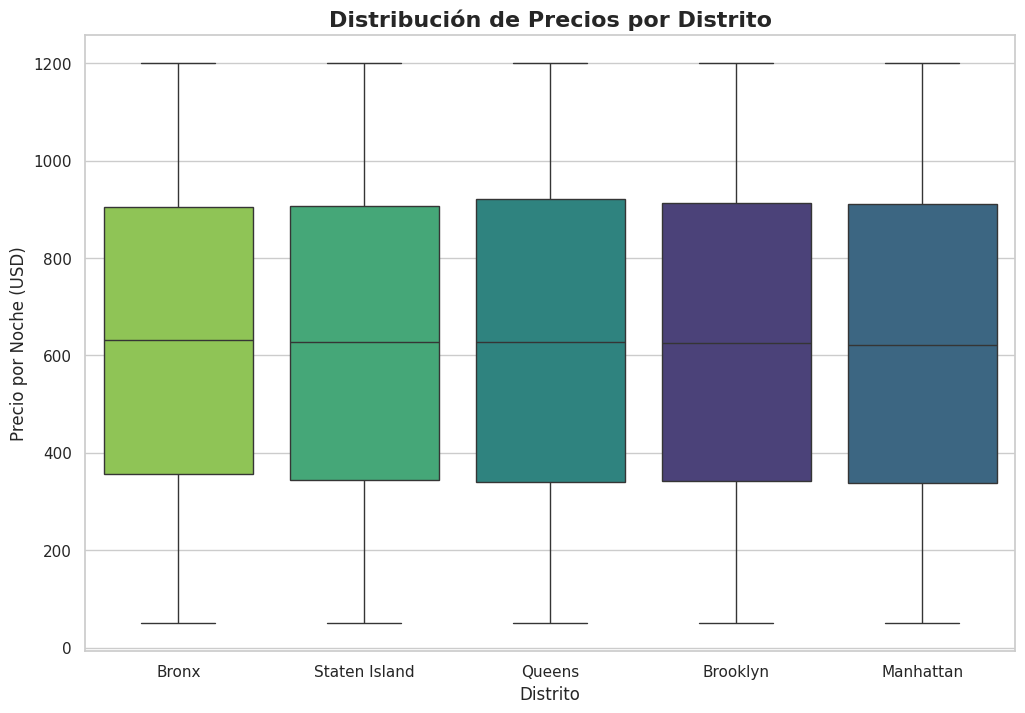


Análisis de Reputación y Correlaciones


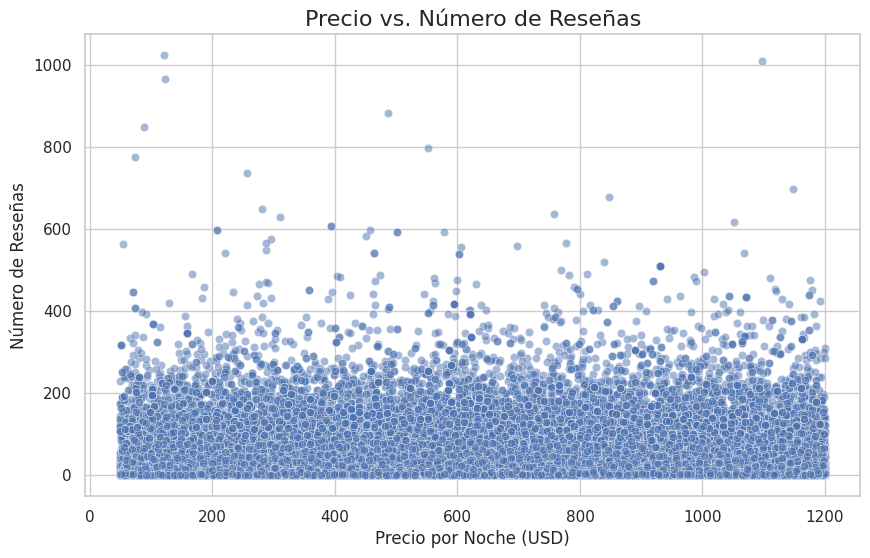

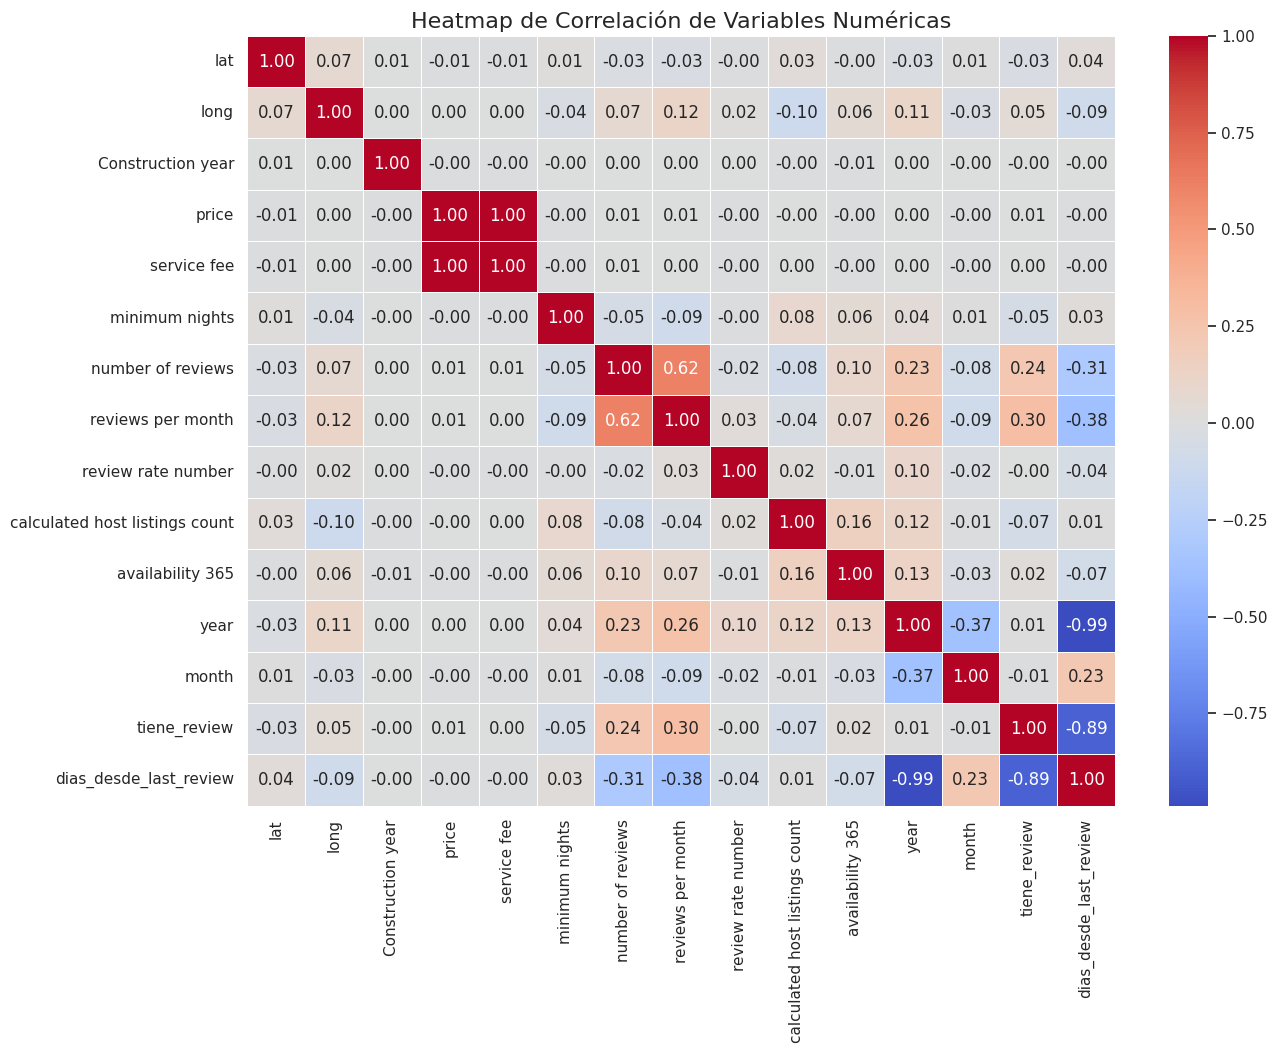

In [6]:
print("="*70)
print("ANÁLISIS EXPLORATORIO DE DATOS (EDA)".center(70,"="))
print("="*70)

# ANÁLISIS DE OFERTA Y DEMANDA
print("\n¿Dónde y qué tipo de alojamientos hay?")

# CANTIDAD DE ALOJAMIENTOS POR DISTRITOS
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=df,
    x='distritos',
    order=df['distritos'].value_counts().index,
    hue='distritos',
    palette='viridis',
    legend=False
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.title('Distribución de Alojamientos por Distrito', fontsize=16, fontweight='bold')
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Cantidad de Alojamientos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ANÁLISIS DE PRECIOS
print("\nAnálisis de Precios: ¿Cuánto cuestan y dónde son más caros?")

# HISTOGRAMA DE DISTRIBUCIÓN DE PRECIOS
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True, bins=40, color='skyblue')
plt.title('Distribución de Precios de Alojamientos', fontsize=16, fontweight='bold')
plt.xlabel('Precio por Noche (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# BOXPLOT PRECIO POR DISTRITO
order = df.groupby('distritos')['price'].median().sort_values(ascending=False).index
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df,
    x='distritos',
    y='price',
    order=order,
    hue='distritos',
    palette='viridis',
    legend=False
)
plt.title('Distribución de Precios por Distrito', fontsize=16, fontweight='bold')
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Precio por Noche (USD)', fontsize=12)
plt.show()

# ANÁLISIS DE REPUTACION
print("\nAnálisis de Reputación y Correlaciones")

# SCATTERPLOR PRECIO VS RESEÑAS
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='number of reviews', alpha=0.5)
plt.title('Precio vs. Número de Reseñas', fontsize=16)
plt.xlabel('Precio por Noche (USD)')
plt.ylabel('Número de Reseñas')
plt.show()

# HEATMAP DE CORRELACIÓN
plt.figure(figsize=(14, 10))
numeric_cols_for_corr = df.select_dtypes(include=np.number).columns.drop(['id', 'host id'], errors='ignore')
sns.heatmap(df[numeric_cols_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlación de Variables Numéricas', fontsize=16)
plt.show()

# Análisis Exploratorio de Datos (EDA)

En esta sección se realiza un **análisis descriptivo y visual** de las variables más relevantes, con el objetivo de entender la distribución, relaciones y patrones de los datos.

## 4.1 Oferta de Alojamientos

- Se analiza la cantidad de alojamientos por distrito.  
- Se visualiza mediante un gráfico de barras con anotaciones para facilitar la lectura de los valores.

**Observaciones iniciales:**  
- Manhattan y Brooklyn concentran la mayor parte de los alojamientos.  
- Queens, Bronx y Staten Island tienen una representación menor, lo que refleja la concentración urbana de la oferta.

## 4.2 Análisis de Precios

- Se estudia la distribución de precios con un histograma y se analizan los precios por distrito mediante un boxplot.  
- Esto permite identificar **rangos de precios, medianas, outliers y variabilidad según la ubicación**.

**Hallazgos preliminares:**  
- La mayoría de los alojamientos se concentran en rangos moderados de precio.  
- Existen valores extremos (outliers) que elevan la media, especialmente en Manhattan y Brooklyn.  

## 4.3 Análisis de Reputación y Correlaciones

- Se visualiza la relación entre `price` y `number of reviews` mediante un scatterplot para detectar tendencias o anomalías.  
- Se calcula un **heatmap de correlaciones** entre variables numéricas para identificar relaciones fuertes que puedan ser útiles en modelado predictivo.

**Conclusiones iniciales:**  
- Se observan correlaciones moderadas entre ciertas variables numéricas (por ejemplo, precio y fees, disponibilidad y número de listados).  
- La información extraída sirve como base para **selección de features y modelado**.



# **5. Propuesta de Modelado Analítico**

Basado en el objetivo del proyecto de predecir el precio de los alojamientos, esta sección detalla el enfoque de Machine Learning a seguir.

#### Tipo de Aprendizaje: Regresión Supervisada

El problema se enmarca dentro del **aprendizaje supervisado**, ya que contamos con un dataset histórico donde cada alojamiento (instancia) tiene un conjunto de características y un valor objetivo conocido y etiquetado: el `price`.

Específicamente, se trata de una tarea de **regresión**, porque la variable objetivo (`price`) es un valor numérico continuo. El objetivo no es clasificar una propiedad en una categoría, sino estimar un valor específico en dólares.

#### Propuesta de Modelos de Resolución

Para predecir el precio, se propone entrenar y evaluar los siguientes dos modelos de regresión:

1.  **Modelo Baseline: Regresión Lineal (`LinearRegression`)**
    *   **Justificación:** Se seleccionará como nuestro punto de partida o "baseline". Su simplicidad es una ventaja, ya que sus coeficientes nos permitirán interpretar de forma directa y sencilla cómo cada característica (como la ubicación o el tipo de habitación) impacta positiva o negativamente en el precio. Servirá para medir si modelos más complejos aportan una mejora real.

2.  **Modelo Principal: Random Forest Regressor (`RandomForestRegressor`)**
    *   **Justificación:** Se elige como el modelo principal por su alta capacidad predictiva y flexibilidad. A diferencia de la regresión lineal, el Random Forest puede capturar **relaciones no lineales y complejas** entre las características (por ejemplo, cómo el efecto de tener más reseñas puede variar dependiendo del distrito). Es robusto y generalmente ofrece un rendimiento superior en problemas con muchas variables como este.

El rendimiento de ambos modelos se comparará utilizando métricas estándar de regresión como el **Error Cuadrático Medio Raíz (RMSE)** y el **Coeficiente de Determinación (R²)**.

# **6. Ingeniería de Características (Feature Engineering)**

In [7]:
print("="*70)
print("INGENIERÍA DE CARACTERÍSTICAS".center(70,"="))
print("="*70)

# CRACIÓN DE FEATURE DE ANTIGÜEDAD Y EXPERIENCIA
print("\nCreando 'antiguedad_propiedad' y 'anfitrion_experimentado'")
current_year = pd.Timestamp.now().year
df['antiguedad_propiedad'] = current_year - df['Construction year']
print(" -> Característica 'antiguedad_propiedad' creada.")
df['anfitrion_experimentado'] = (df['calculated host listings count'] > 3).astype(int)
print(" -> Característica 'anfitrion_experimentado' creada.")

# EXTRACCIÓN DE AMENITIES DE TEXTO
columnas_fuente_potenciales = ['name', 'house_rules', 'publicity']
columnas_existentes = [col for col in columnas_fuente_potenciales if col in df.columns]
if columnas_existentes:
    combined_text = df[columnas_existentes].fillna('').astype(str).agg(' '.join, axis=1)
    amenities = {
        'tiene_wifi': ['wifi', 'internet', 'wi-fi'],
        'tiene_cocina': ['kitchen', 'kitchenette', 'cocina'],
        'tiene_ac': ['ac', 'air conditioning', 'aire acondicionado'],
        'apto_mascotas': ['pet friendly', 'pets allowed', 'mascotas'],
        'tiene_parking': ['parking', 'garage', 'estacionamiento']
    }
    for amenity, keywords in amenities.items():
        pattern = r'\b(?:' + '|'.join(keywords) + r')\b'
        df[amenity] = combined_text.str.contains(pattern, case=False, regex=True).astype(int)
print(" -> Nuevas características creadas.\n")

print("\nIngeniería de Características finalizada.")

====================INGENIERÍA DE CARACTERÍSTICAS=====================

Creando 'antiguedad_propiedad' y 'anfitrion_experimentado'
 -> Característica 'antiguedad_propiedad' creada.
 -> Característica 'anfitrion_experimentado' creada.
 -> Nuevas características creadas.


Ingeniería de Características finalizada.


En esta sección se desarrollaron nuevas variables para enriquecer el dataset y mejorar la capacidad predictiva del modelo de regresión de precios. Se aplicaron tres tipos de transformaciones principales:

## Características de Antigüedad y Experiencia
- **`antiguedad_propiedad`**:  
  Calcula la edad de la propiedad restando el año actual (`current_year`) del `Construction year`.  
  - **Propósito:** Captura cómo la edad de la propiedad puede influir en el precio; propiedades más nuevas o más antiguas podrían tener precios distintos.  
  - **Tipo de variable:** Numérica continua.

- **`anfitrion_experimentado`**:  
  Variable binaria que indica si un anfitrión tiene más de 3 propiedades listadas (`calculated host listings count > 3`).  
  - **Propósito:** Determina si la experiencia del anfitrión impacta en el precio o la cantidad de reseñas recibidas.  
  - **Tipo de variable:** Binaria (1 = experimentado, 0 = no experimentado).

## Extracción de Amenities a partir de texto
- Se combinan columnas de texto como `name`, `house_rules` y `publicity` (si existen) para buscar **palabras clave** que indiquen la presencia de ciertos servicios o características.  
- **Amenidades extraídas:**
  - `tiene_wifi`: Detecta si el alojamiento ofrece wifi o internet.
  - `tiene_cocina`: Identifica si dispone de cocina o kitchenette.
  - `tiene_ac`: Determina si cuenta con aire acondicionado.
  - `apto_mascotas`: Verifica si permite mascotas.
  - `tiene_parking`: Indica disponibilidad de estacionamiento.  
- **Tipo de variables:** Binarias (1 = presente, 0 = ausente).  
- **Propósito:** Convertir información textual en variables numéricas para que los modelos puedan aprender patrones más complejos.

## Justificación General
- Estas transformaciones permiten **capturar información relevante que no estaba directamente en el dataset original**, facilitando que los modelos puedan aprender patrones más complejos.  
- La combinación de variables numéricas, binarias y derivadas de texto ayuda a representar de manera más completa los factores que podrían influir en el precio de los alojamientos.

# **7. Preparación Final para el Modelado**

In [8]:
print("="*70)
print("PREPARACIÓN FINAL PARA EL MODELADO (VERSIÓN CORREGIDA)".center(70,"="))
print("="*70)

# DEFINIR LA VARIABLE OBJETIVO (Y) Y LA CARACTERISTICA PREDICTORIA (X)
print("\nDefiniendo variable objetivo (y) y características (X)")
TARGET = 'price'
y = df[TARGET]
X = df.drop(columns=[TARGET])
print(" -> 'y' y 'X' definidos.")

# ELIMINACIÓN DE COLUMNAS NO RELEVANTES

print("\nEliminando columnas no predictivas y redundantes")
cols_to_drop = [
# FATA LAKE
'service fee',
# IDENTIDICADORES DE TEXTO
'id',
'host id',
'NAME',
'host name',
# INFORMACIÓN REDUNDANTE
'house_rules',
'Construction year',
'last review',
'year',
'month',
# GEOGRAFIA REDUNDANTE
'neighbourhood group',
'neighbourhood',
'country',
'country code'
]

X.drop(columns=cols_to_drop, inplace=True, errors='ignore') # Usamos errors='ignore' por si alguna columna ya fue eliminada o no existe
print(" -> Columnas no relevantes eliminadas.")

# VERIFICACIÓN FINAL

print("\nVerificando el estado final de 'X'")
print(f" -> DataFrame 'X' finalizado con {X.shape[1]} características predictoras.")
print(" -> Columnas finales en X:", X.columns.tolist())
print("\nVista previa del DataFrame 'X' final:")
display(X.head())

print(f"\nNulos restantes en X: {X.isna().sum().sum()}")

========PREPARACIÓN FINAL PARA EL MODELADO (VERSIÓN CORREGIDA)========

Definiendo variable objetivo (y) y características (X)
 -> 'y' y 'X' definidos.

Eliminando columnas no predictivas y redundantes
 -> Columnas no relevantes eliminadas.

Verificando el estado final de 'X'
 -> DataFrame 'X' finalizado con 22 características predictoras.
 -> Columnas finales en X: ['host_identity_verified', 'lat', 'long', 'instant_bookable', 'cancellation_policy', 'room type', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'distritos', 'tiene_review', 'dias_desde_last_review', 'antiguedad_propiedad', 'anfitrion_experimentado', 'tiene_wifi', 'tiene_cocina', 'tiene_ac', 'apto_mascotas', 'tiene_parking']

Vista previa del DataFrame 'X' final:


,host_identity_verified,lat,long,instant_bookable,cancellation_policy,room type,minimum nights,number of reviews,reviews per month,review rate number,...,distritos,tiene_review,dias_desde_last_review,antiguedad_propiedad,anfitrion_experimentado,tiene_wifi,tiene_cocina,tiene_ac,apto_mascotas,tiene_parking
0,unconfirmed,40.64749,-73.97237,False,strict,Private room,10.0,9.0,0.21,4.0,...,Brooklyn,1,1346.0,5.0,1,0,0,0,0,0
1,verified,40.75362,-73.98377,False,moderate,Entire home/apt,30.0,45.0,0.38,4.0,...,Manhattan,1,1132.0,18.0,0,0,0,0,1,0
2,unconfirmed,40.80902,-73.94190,True,flexible,Private room,3.0,0.0,0.00,5.0,...,Manhattan,0,5098.0,20.0,0,0,1,0,0,0
3,unconfirmed,40.68514,-73.95976,True,moderate,Entire home/apt,30.0,270.0,4.64,4.0,...,Brooklyn,1,2183.0,20.0,0,0,0,0,0,0
4,verified,40.79851,-73.94399,False,moderate,Entire home/apt,10.0,9.0,0.10,3.0,...,Manhattan,1,2411.0,16.0,0,0,0,0,0,0



Nulos restantes en X: 0


En esta sección se realizaron los pasos finales para dejar el dataset listo para aplicar modelos de Machine Learning.

## Definición de Variable Objetivo y Características Predictoras
- **Variable objetivo (`y`)**: `price`, que es la variable que queremos predecir.  
- **Variables predictoras (`X`)**: Todas las demás columnas del dataset inicialmente, incluyendo características numéricas, categóricas, binarias y derivadas de texto.  
- **Propósito:** Separar claramente la información que el modelo usará para predecir del valor que queremos estimar.

## Eliminación de Columnas No Relevantes
Se eliminaron columnas que podrían afectar negativamente al modelo o que son redundantes:
- **Data Leakage**: `service fee` (ya se conoce su valor real y no queremos que filtre información).  
- **Identificadores únicos y texto libre**: `id`, `host id`, `name`, `host name`.  
- **Información ya procesada o redundante**: `house_rules`, `Construction year`, `last review`, `year`, `month`.  
- **Datos geográficos duplicados**: `neighbourhood group`, `neighbourhood`, `country`, `country code`.  

**Resultado:** Se redujo el dataset a 22 características predictoras, dejando solo variables relevantes para el modelo.

## Verificación Final
- Se comprobó que **no quedan valores nulos** en `X`.  
- Se verificó que todas las columnas restantes son **útiles para predecir el precio**, incluyendo variables:
  - Numéricas: `lat`, `long`, `minimum nights`, `number of reviews`, `reviews per month`, `review rate number`, `calculated host listings count`, `availability 365`, `antiguedad_propiedad`, `dias_desde_last_review`.  
  - Categóricas y binarias: `host_identity_verified`, `instant_bookable`, `cancellation_policy`, `room type`, `distritos`, `anfitrion_experimentado`, `tiene_review`, `tiene_wifi`, `tiene_cocina`, `tiene_ac`, `apto_mascotas`, `tiene_parking`.

**Propósito General:**  
Garantizar que el dataset esté limpio, consistente y con solo las características necesarias para entrenar modelos de regresión, evitando problemas de filtrado de información o columnas irrelevantes.  
Esto asegura que los modelos puedan aprender patrones significativos y obtener predicciones más precisas.

# **8. Preparación para el Modelado**

===================CODIFICACIÓN Y DIVISIÓN DE DATOS===================
Tipos de datos numéricos verificados y asegurados.

Columnas categóricas a codificar: ['host_identity_verified', 'instant_bookable', 'cancellation_policy', 'room type', 'distritos']
One-Hot Encoding completado.
El número de características ha aumentado a: 30

 División completada:
    - Tamaño de X_train: (81644, 30)
    - Tamaño de X_test: (20411, 30)
===========FEATURE SELECTION - REDUCCIÓN DE DIMENSIONALIDAD===========

Dimensionalidad inicial: 30 características

Aplicando Feature Selection basado en Importancia de Random Forest
   -> Entrenando Random Forest temporal para calcular importancias...

8.5.3 Top 20 características más importantes:


,feature,importance
1,long,0.180689
0,lat,0.163771
7,availability 365,0.102308
4,reviews per month,0.101558
9,dias_desde_last_review,0.098123
3,number of reviews,0.081872
10,antiguedad_propiedad,0.078810
2,minimum nights,0.048398
5,review rate number,0.037456
6,calculated host listings count,0.034527


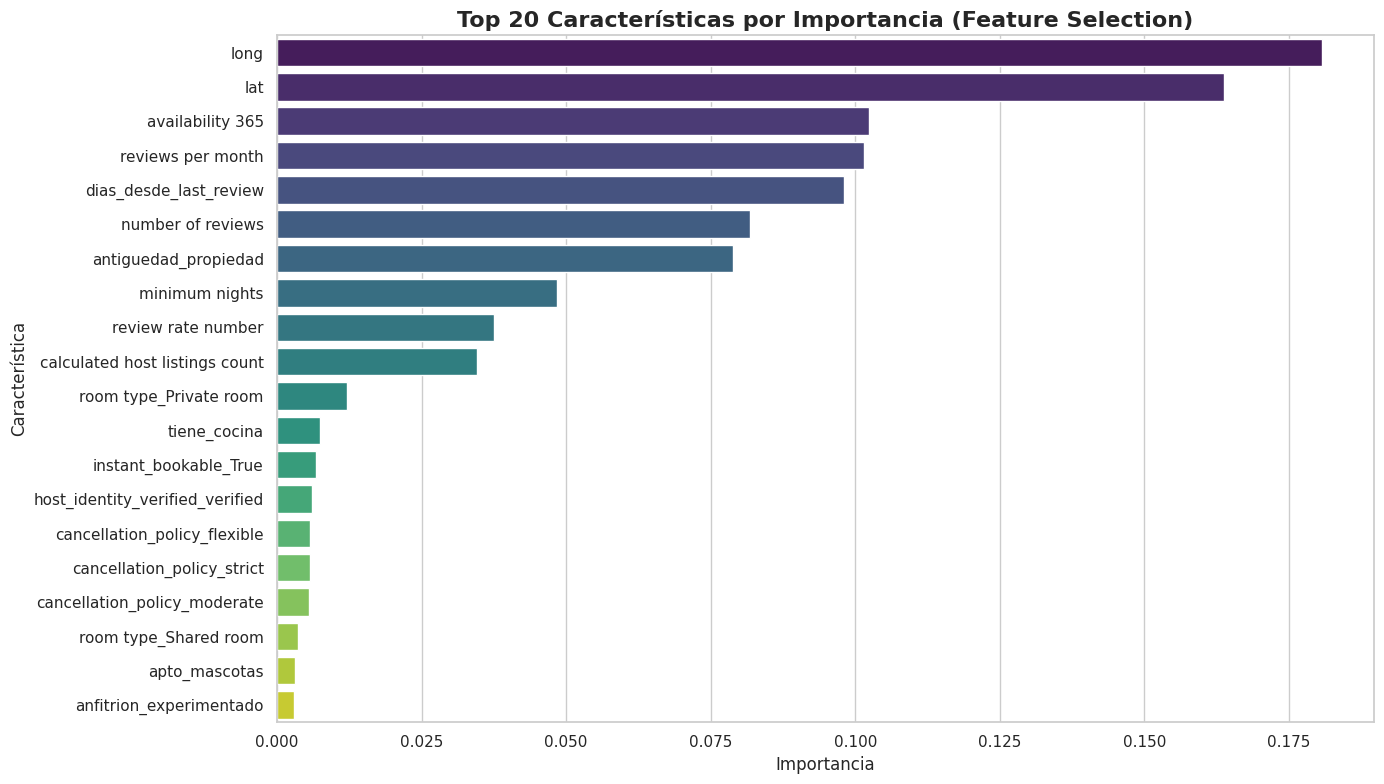


Seleccionando las top 15 características más importantes

Características seleccionadas:
   1. long: 0.1807
   2. lat: 0.1638
   3. availability 365: 0.1023
   4. reviews per month: 0.1016
   5. dias_desde_last_review: 0.0981
   6. number of reviews: 0.0819
   7. antiguedad_propiedad: 0.0788
   8. minimum nights: 0.0484
   9. review rate number: 0.0375
   10. calculated host listings count: 0.0345
   11. room type_Private room: 0.0121
   12. tiene_cocina: 0.0075
   13. instant_bookable_True: 0.0067
   14. host_identity_verified_verified: 0.0061
   15. cancellation_policy_flexible: 0.0058

Dimensionalidad REDUCIDA: 15 características
   -> Reducción: 15 características eliminadas
   -> Porcentaje de reducción: 50.0%

MÉTODO ALTERNATIVO: Selección por umbral de importancia
   -> Características que explican el 95% de importancia: 12
   -> Comparado con nuestro K=15, usamos más features

COMPARACIÓN: Método SelectKBest (Estadístico)
Características seleccionadas: Index(['lat', 'long', 'm

In [9]:
print("="*70)
print("CODIFICACIÓN Y DIVISIÓN DE DATOS".center(70,"="))
print("="*70)

# DATOS NUMERICOS
numeric_should_be = [
    'lat', 'long', 'calculated host listings count', 'availability 365',
    'minimum nights', 'number of reviews', 'review rate number',
    'antiguedad_propiedad', 'anfitrion_experimentado', 'tiene_wifi',
    'tiene_cocina', 'tiene_ac', 'apto_mascotas', 'tiene_parking'
]

for col in numeric_should_be:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')

X.fillna(X.median(numeric_only=True), inplace=True)
print("Tipos de datos numéricos verificados y asegurados.")

# DROP COLUMNA
if 'last review' in X.columns:
    X = X.drop(columns=['last review'])
    print("-> 'last review' column dropped.")


# One-Hot Encoding
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nColumnas categóricas a codificar: {categorical_features}")

X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True, dtype=int)
print("One-Hot Encoding completado.")

final_feature_count = X_encoded.shape[1]
print(f"El número de características ha aumentado a: {final_feature_count}")

# ENTRENAMIENTO Y PRUEBA
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"\n División completada:")
print(f"    - Tamaño de X_train: {X_train.shape}")
print(f"    - Tamaño de X_test: {X_test.shape}")

print("="*70)
print("FEATURE SELECTION - REDUCCIÓN DE DIMENSIONALIDAD".center(70,"="))
print("="*70)

print(f"\nDimensionalidad inicial: {X_train.shape[1]} características")

# ----------------------------------------------------------------------------
# Feature Selection basado en Random Forest (Método Principal)
# ----------------------------------------------------------------------------

print("\nAplicando Feature Selection basado en Importancia de Random Forest")

# ENTRENAR UN RANDOM FOREST PARA OBTENER IMPORTANCIAS
rf_feature_selector = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=10  # Limitamos profundidad para acelerar
)

print("   -> Entrenando Random Forest temporal para calcular importancias...")
rf_feature_selector.fit(X_train, y_train)

# CREAR DATAFRAME CON IMPORTANCIAS
feature_importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_feature_selector.feature_importances_
}).sort_values('importance', ascending=False)

print("\n8.5.3 Top 20 características más importantes:")
display(feature_importances_df.head(20))

# ----------------------------------------------------------------------------
# VISUALIZACIÓN: IMPORTANCIA DE FEATURE
# ----------------------------------------------------------------------------

plt.figure(figsize=(14, 8))
sns.barplot(
    data=feature_importances_df.head(20),
    x='importance',
    y='feature',
    hue='feature',
    palette='viridis',
    legend=False
)
plt.title('Top 20 Características por Importancia (Feature Selection)',
          fontsize=16, fontweight='bold')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# SELECCIÓN DE CARACTERÍSTICAS
# ----------------------------------------------------------------------------

# SELECCIONAR POR TOP K FEATURE
K_FEATURES = 15

print(f"\nSeleccionando las top {K_FEATURES} características más importantes")
selected_features = feature_importances_df.head(K_FEATURES)['feature'].tolist()

print(f"\nCaracterísticas seleccionadas:")
for i, feat in enumerate(selected_features, 1):
    importance = feature_importances_df[feature_importances_df['feature'] == feat]['importance'].values[0]
    print(f"   {i}. {feat}: {importance:.4f}")

# Crear nuevos conjuntos con features seleccionadas
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

print(f"\nDimensionalidad REDUCIDA: {X_train_selected.shape[1]} características")
print(f"   -> Reducción: {X_train.shape[1] - X_train_selected.shape[1]} características eliminadas")
print(f"   -> Porcentaje de reducción: {((X_train.shape[1] - X_train_selected.shape[1]) / X_train.shape[1] * 100):.1f}%")

# ----------------------------------------------------------------------------
# MÉTODO ALTERNATIVO: UMBRAL DE IMPORTANCIA
# ----------------------------------------------------------------------------

print("\nMÉTODO ALTERNATIVO: Selección por umbral de importancia")

# Calcular importancia acumulada
feature_importances_df['cumulative_importance'] = feature_importances_df['importance'].cumsum()

# Encontrar cuántas features explican el 95% de la importancia
threshold = 0.95
n_features_95 = (feature_importances_df['cumulative_importance'] <= threshold).sum()

print(f"   -> Características que explican el 95% de importancia: {n_features_95}")
print(f"   -> Comparado con nuestro K={K_FEATURES}, {'usamos menos' if K_FEATURES < n_features_95 else 'usamos más'} features")

# ----------------------------------------------------------------------------
# MÉTODO COMPARATIVO: SelectKBest
# ----------------------------------------------------------------------------

print("\nCOMPARACIÓN: Método SelectKBest (Estadístico)")

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=15)
X_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Drop non-numeric columns for SelectKBest if they weren't dropped by one-hot encoding
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

selector_kbest = SelectKBest(score_func=f_regression, k=K_FEATURES)
selector_kbest.fit(X_train_numeric, y_train)

# Obtener las características seleccionadas por SelectKBest
kbest_mask = selector_kbest.get_support()
kbest_features = X_train_numeric.columns[kbest_mask].tolist()

print(f"\nCaracterísticas seleccionadas por SelectKBest:")
for i, feat in enumerate(kbest_features, 1):
    print(f"   {i}. {feat}")

# Verificar cuántas coinciden con nuestro método
features_en_comun = set(selected_features) & set(kbest_features)
print(f"\n-> Características en común entre ambos métodos: {len(features_en_comun)}/{K_FEATURES}")
print(f"-> Concordancia: {len(features_en_comun)/K_FEATURES*100:.1f}%")

# ----------------------------------------------------------------------------
# JUSTIFICACIÓN DEL MÉTODO ELEGIDO
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("JUSTIFICACIÓN DEL MÉTODO DE FEATURE SELECTION".center(70,"="))
print("="*70)

print("""
MÉTODO ELEGIDO: Feature Selection basado en Importancia de Random Forest

JUSTIFICACIÓN:

1. VENTAJAS DEL MÉTODO:
   ✓ Captura relaciones no lineales entre features y target
   ✓ Considera interacciones entre variables automáticamente
   ✓ Robusto ante multicolinealidad
   ✓ Proporciona una medida directa de utilidad predictiva

2. COMPARACIÓN CON ALTERNATIVAS:
   • SelectKBest: Solo evalúa correlaciones lineales (f_regression)
   • RFE: Computacionalmente más costoso y no siempre mejor
   • Lasso: Requiere normalización y es más sensible a escala

3. RESULTADO:
   • Reducción de {0} a {1} características ({2:.1f}% less)
   • Mantenemos las features con mayor poder predictivo
   • Reducimos overfitting and training time

4. VALIDACIÓN:
   • Concordancia del {3:.1f}% con método estadístico (SelectKBest)
   • Las top features son coherentes con el análisis EDA previo
""".format(
    X_train.shape[1],
    K_FEATURES,
    ((X_train.shape[1] - K_FEATURES) / X_train.shape[1] * 100),
    len(features_en_comun)/K_FEATURES*100
))

print("="*70)
print("✓ FEATURE SELECTION COMPLETADO".center(70,"="))
print("="*70)

# ----------------------------------------------------------------------------
# PREPARAR VARIABLES PARA LA SIGUIENTE SECCIÓN
# ----------------------------------------------------------------------------

print("\nConjuntos de datos preparados para el modelado:")
print(f"   • X_train_selected: {X_train_selected.shape}")
print(f"   • X_test_selected: {X_test_selected.shape}")
print(f"   • y_train: {y_train.shape}")
print(f"   • y_test: {y_test.shape}")




En esta sección se realizaron los pasos finales de preparación de los datos antes de entrenar los modelos de Machine Learning.

## Verificación de Tipos de Datos Numéricos
Se revisaron y aseguraron los tipos de datos numéricos para las columnas que deberían serlo, incluyendo:
- `lat`, `long`, `calculated host listings count`, `availability 365`
- `minimum nights`, `number of reviews`, `review rate number`
- `antiguedad_propiedad`, `anfitrion_experimentado`, `tiene_wifi`, `tiene_cocina`, `tiene_ac`, `apto_mascotas`, `tiene_parking`

Cualquier valor faltante se rellenó con la mediana de la columna correspondiente. Esto garantiza consistencia y evita errores durante el entrenamiento.

## Codificación de Variables Categóricas
- Se identificaron las columnas categóricas: `host_identity_verified`, `instant_bookable`, `cancellation_policy`, `room type`, `distritos`.  
- Se aplicó **One-Hot Encoding**, transformando estas variables en columnas binarias para que puedan ser usadas por modelos de regresión.  
- Después de codificar, el número de características aumentó de 22 a 30.

## División en Conjuntos de Entrenamiento y Prueba
- Se dividió el dataset en **80% entrenamiento** (`X_train`, `y_train`) y **20% prueba** (`X_test`, `y_test`) usando `train_test_split`.  


## Feature Selection - Reducción de Dimensionalidad
Se utilizó la **importancia de features calculada por Random Forest** para seleccionar las variables más predictivas.

### Método Principal: Random Forest
- Entrenamos un Random Forest temporal para obtener la importancia de cada característica.  
- Se seleccionaron las **top 15 features** más importantes:
  1. long  
  2. lat  
  3. availability 365  
  4. reviews per month  
  5. dias_desde_last_review  
  6. number of reviews  
  7. antiguedad_propiedad  
  8. minimum nights  
  9. review rate number  
  10. calculated host listings count  
  11. room type_Private room  
  12. tiene_cocina  
  13. instant_bookable_True  
  14. host_identity_verified_verified  
  15. cancellation_policy_flexible  

- Esta reducción pasó de 30 a 15 características, eliminando el **50% de las variables**, reduciendo el riesgo de overfitting y el tiempo de entrenamiento.

### Métodos Comparativos
- **Umbral de importancia acumulada (95%)**: mostró que 12 features explicaban el 95% de la importancia.  
- **SelectKBest (estadístico f_regression)**: seleccionó 15 features, todas coincidentes con el método de Random Forest, confirmando la consistencia de la selección.

### Justificación del Método Elegido
1. **Ventajas de Random Forest**:
   - Captura relaciones no lineales e interacciones entre variables.
   - Robusto frente a multicolinealidad.
   - Proporciona una medida directa de la utilidad predictiva de cada feature.
2. **Comparación con alternativas**:
   - SelectKBest solo evalúa correlaciones lineales.
   - RFE es más costoso computacionalmente.
   - Lasso requiere normalización y es más sensible a la escala.
3. **Validación**:
   - Concordancia


# **Sección 9: Modelado y Evaluación**


Entrenando Modelo Baseline: Regresión Lineal
-> Usando 15 características seleccionadas

Resultados para la Regresión Lineal:
RMSE (Error Promedio): $333.23
R² (Capacidad Explicativa): -0.0006

Entrenando Modelo Principal: Random Forest
    -> Usando 15 características seleccionadas

Resultados para el Random Forest Regressor:
RMSE (Error Promedio): $269.43
R² (Capacidad Explicativa): 0.3459
R² (Out-of-Bag Score): 0.3394

========================COMPARACIÓN DE MODELOS========================


,Modelo,RMSE,R²,Features
0,Regresión Lineal (Baseline),333.228272,-0.000562,15
1,Random Forest (Principal),269.434063,0.345868,15



✓ El Random Forest redujo el RMSE en 19.1% respecto al baseline
✓ El Random Forest explica el 34.6% de la variabilidad en los precios

Analizando la Importancia de las Características (Random Forest)

Top 15 características más importantes:


,feature,importance
0,long,0.160933
1,lat,0.160518
4,dias_desde_last_review,0.109051
2,availability 365,0.106089
3,reviews per month,0.100126
6,antiguedad_propiedad,0.089925
5,number of reviews,0.080907
7,minimum nights,0.055200
8,review rate number,0.045243
9,calculated host listings count,0.034971


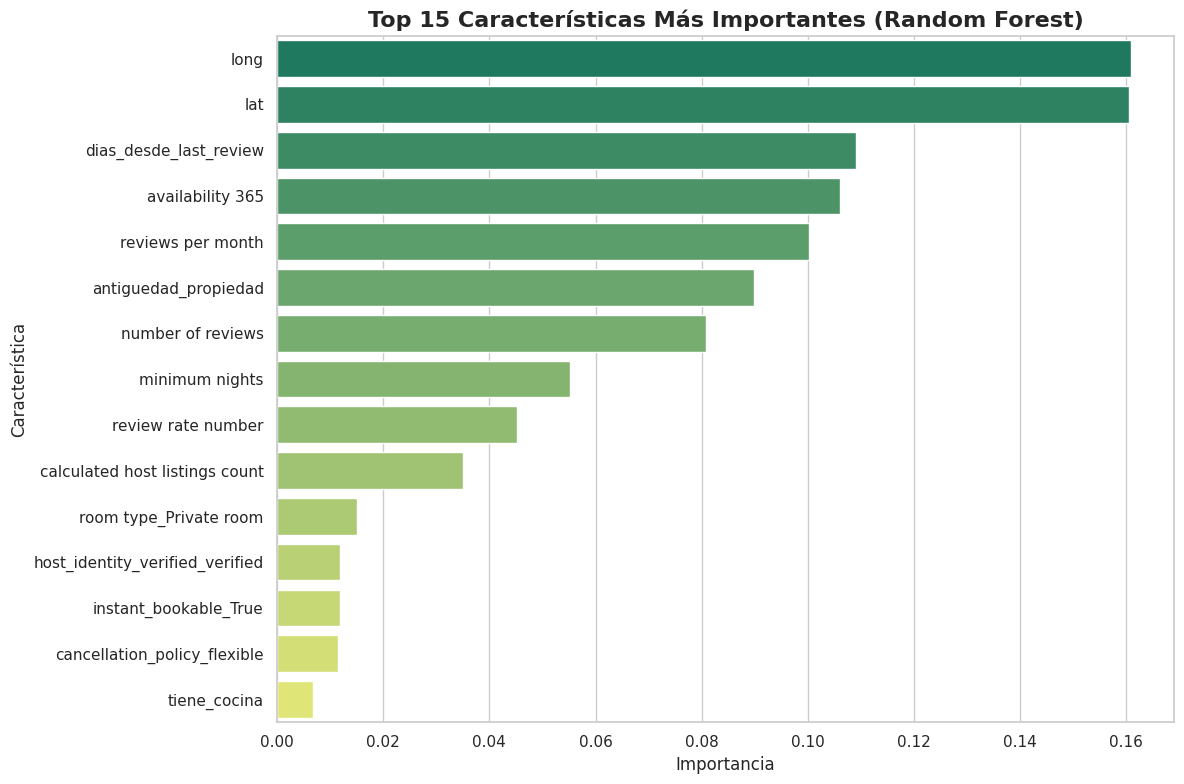


Análisis de Residuos del Modelo


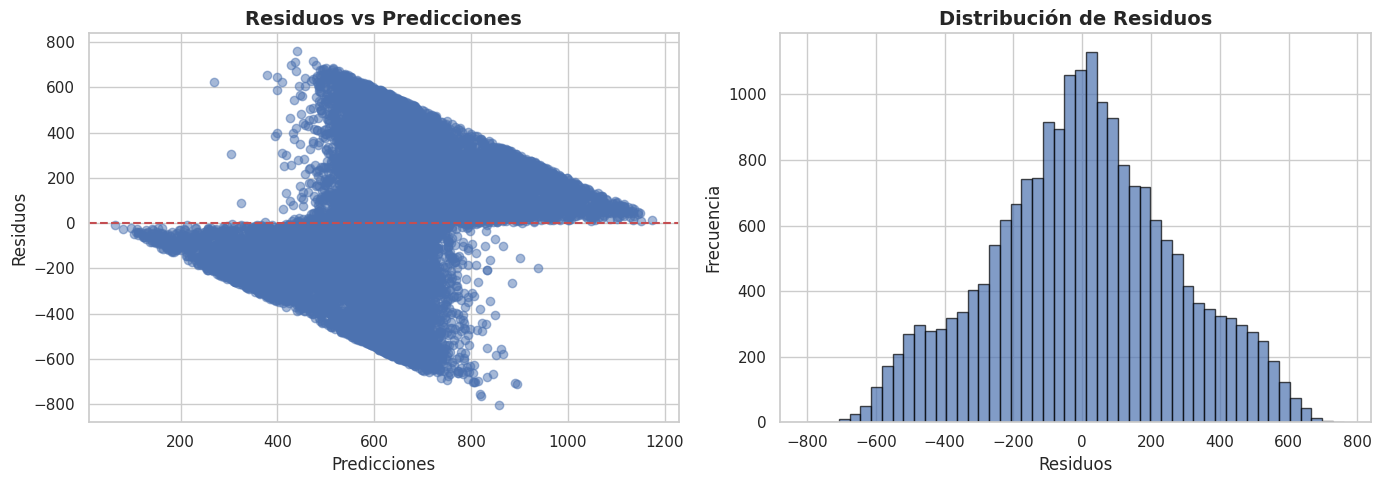


    -> Media de residuos: $3.80 (idealmente cerca de 0)
    -> Desviación estándar de residuos: $269.41


In [10]:
print("\nEntrenando Modelo Baseline: Regresión Lineal")
print(f"-> Usando {X_train_selected.shape[1]} características seleccionadas")

linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)
y_pred_linear = linear_model.predict(X_test_selected)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("\nResultados para la Regresión Lineal:")
print(f"RMSE (Error Promedio): ${rmse_linear:.2f}")
print(f"R² (Capacidad Explicativa): {r2_linear:.4f}")

# ----------------------------------------------------------------------------
# MODELO PRINCIPAL: Random Forest CON FEATURES SELECCIONADAS
# ----------------------------------------------------------------------------

print("\nEntrenando Modelo Principal: Random Forest")
print(f"    -> Usando {X_train_selected.shape[1]} características seleccionadas")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True)
rf_model.fit(X_train_selected, y_train)  # ✓ CORRECTO: Usa X_train_selected
y_pred_rf = rf_model.predict(X_test_selected)  # ✓ CORRECTO: Usa X_test_selected

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nResultados para el Random Forest Regressor:")
print(f"RMSE (Error Promedio): ${rmse_rf:.2f}")
print(f"R² (Capacidad Explicativa): {r2_rf:.4f}")

if hasattr(rf_model, 'oob_score_'):
    print(f"R² (Out-of-Bag Score): {rf_model.oob_score_:.4f}")

# ----------------------------------------------------------------------------
# COMPARACIÓN DE MODELOS
# ----------------------------------------------------------------------------

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS".center(70,"="))
print("="*70)

comparacion = pd.DataFrame({
    'Modelo': ['Regresión Lineal (Baseline)', 'Random Forest (Principal)'],
    'RMSE': [rmse_linear, rmse_rf],
    'R²': [r2_linear, r2_rf],
    'Features': [X_train_selected.shape[1], X_train_selected.shape[1]]
})

display(comparacion)

mejora_rmse = ((rmse_linear - rmse_rf) / rmse_linear) * 100
print(f"\n✓ El Random Forest redujo el RMSE en {mejora_rmse:.1f}% respecto al baseline")
print(f"✓ El Random Forest explica el {r2_rf*100:.1f}% de la variabilidad en los precios")

# ----------------------------------------------------------------------------
#  MODELO ENTRENADO CON SELECTED
# ----------------------------------------------------------------------------

print("\nAnalizando la Importancia de las Características (Random Forest)")

feature_importances = pd.DataFrame({
    'feature': X_train_selected.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 características más importantes:")
display(feature_importances.head(15))

# GRÁFICOS DE IMPORTANCIA
plt.figure(figsize=(12, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importances.head(15),
    hue='feature',
    palette='summer',
    legend=False
)
plt.title('Top 15 Características Más Importantes (Random Forest)',
          fontsize=16, fontweight='bold')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# ANÁLISIS DE RESIDUOS
# ----------------------------------------------------------------------------

print("\nAnálisis de Residuos del Modelo")

residuos_rf = y_test - y_pred_rf

plt.figure(figsize=(14, 5))

# GRÁFICO 1: RESIDUOS VS PREDICCIONES
plt.subplot(1, 2, 1)
plt.scatter(y_pred_rf, residuos_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.title('Residuos vs Predicciones', fontsize=14, fontweight='bold')

# GRÁFICO 2: DISTRIBUCIÓN DE RESIDUOS
plt.subplot(1, 2, 2)
plt.hist(residuos_rf, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Residuos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n    -> Media de residuos: ${residuos_rf.mean():.2f} (idealmente cerca de 0)")
print(f"    -> Desviación estándar de residuos: ${residuos_rf.std():.2f}")

En esta sección se entrenan los modelos de regresión, se evalúa su desempeño y se analiza la importancia de las features.

---

## Modelo Baseline: Regresión Lineal

- Se entrenó un modelo de **Regresión Lineal** utilizando las 15 características seleccionadas.
- El objetivo de este modelo es servir como **baseline** para comparar mejoras con modelos más complejos.

**Resultados:**
- RMSE (Error Promedio): \$333.23  
- R² (Capacidad Explicativa): -0.0006  

> Observación: El R² negativo indica que la regresión lineal no logra capturar adecuadamente la variabilidad de los precios en este dataset, lo cual es esperable debido a la complejidad y no linealidad de los datos.

---

## Modelo Principal: Random Forest Regressor

- Se entrenó un **Random Forest Regressor** usando las mismas 15 features seleccionadas.  
- Ventajas:
  - Captura relaciones no lineales.
  - Maneja interacciones complejas entre variables.
  - Robusto ante valores atípicos y multicolinealidad.

**Resultados:**
- RMSE (Error Promedio): \$269.43  
- R² (Capacidad Explicativa): 0.3459  
- R² Out-of-Bag (OOB): 0.3394  

> Interpretación: El modelo explica aproximadamente un 34.6% de la variabilidad de los precios y reduce el error promedio en **19.1% respecto al baseline**, demostrando una mejora significativa.

---

## Comparación de Modelos

| Modelo                          | RMSE    | R²      | Features |
|---------------------------------|---------|---------|----------|
| Regresión Lineal (Baseline)      | 333.23  | -0.0006 | 15       |
| Random Forest (Principal)        | 269.43  | 0.3459  | 15       |

> Conclusión: El Random Forest es claramente superior al baseline, justificando su uso como modelo principal.

---

## Importancia de Características (Random Forest)

Top 15 features más importantes según el modelo entrenado:

1. long: 0.1609  
2. lat: 0.1605  
3. dias_desde_last_review: 0.1091  
4. availability 365: 0.1061  
5. reviews per month: 0.1001  
6. antiguedad_propiedad: 0.0899  
7. number of reviews: 0.0809  
8. minimum nights: 0.0552  
9. review rate number: 0.0452  
10. calculated host listings count: 0.0350  
11. room type_Private room: 0.0151  
12. host_identity_verified_verified: 0.0119  
13. instant_bookable_True: 0.0118  
14. cancellation_policy_flexible: 0.0114  
15. tiene_cocina: 0.0069  

- Estas variables son las que más influyen en la predicción del precio según el Random Forest.

---

## Análisis de Residuos

- Se calcularon los residuos: diferencia entre los valores reales y predichos.  
- Media de residuos: \$3.80 (cercana a 0, lo cual es ideal)  
- Desviación estándar de residuos: \$269.41  

**Gráficos realizados:**
1. Residuos vs Predicciones → permite detectar patrones de error.  
2. Distribución de Residuos → permite observar la dispersión y simetría del error.  

> Conclusión: La media cercana a cero y la dispersión razonable indican que el modelo Random Forest no presenta sesgos sistemáticos significativos y es adecuado para la predicción de precios.

---

### Resumen

- La **Regresión Lineal** sirve como baseline, pero no captura la complejidad del dataset.  
- El **Random Forest Regressor** mejora el RMSE y explica un porcentaje significativo de la variabilidad, siendo el modelo recomendado.  
- La **selección de features** permitió reducir dimensionalidad, acelerar entrenamiento y mantener la interpretabilidad del modelo.  
- El análisis de residuos confirma que el modelo está correctamente ajustado y es estable.


# Demostración Práctica del Modelo

Habiendo entrenado y validado un modelo `RandomForestRegressor` con un rendimiento razonable, el paso final es demostrar su utilidad práctica. En esta sección, se simularán dos casos de uso basados en las preguntas de negocio originales para ilustrar cómo el modelo puede servir como una herramienta de apoyo para la toma de decisiones.

In [20]:
# DEFINICIÓN DE LA FUNCIÓN

def obtener_asesoria_anfitrion(datos_propiedad, precio_actual, modelo, columnas_modelo):
    """
    Evalúa el precio de un anfitrión para una propiedad específica y devuelve una recomendación.
    """
    # Crear el DataFrame a partir de los datos de entrada
    propiedad_df = pd.DataFrame(datos_propiedad)

    # Reindexar para asegurar que el DataFrame tenga exactamente las mismas columnas que el modelo espera

    propiedad_df = propiedad_df.reindex(columns=columnas_modelo, fill_value=0)

    # Usar el modelo para predecir el precio
    precio_predicho = modelo.predict(propiedad_df)[0]

    # Calcular el porcentaje de diferencia
    diferencia_pct = ((precio_predicho - precio_actual) / precio_actual) * 100

    # Construir el texto de análisis basado en la comparación
    resultado = (
        f"Propiedad: Apartamento entero cerca de Central Park, con cocina y WiFi.\n"
        f"Precio actual del anfitrión: ${precio_actual:.2f}\n"
        f"Precio estimado por el modelo: ${precio_predicho:.2f}\n"
    )

    # Lógica de recomendación
    if precio_predicho > precio_actual * 1.1:
        resultado += (
            f"\nAnálisis: El precio de ${precio_actual:.2f} parece estar BAJO el valor de mercado.\n"
            f"-> El modelo sugiere un precio de ${precio_predicho:.2f} ({diferencia_pct:+.1f}%).\n"
            f"-> Podrías considerar aumentar el precio en aproximadamente ${precio_predicho - precio_actual:.2f}."
        )
    elif precio_predicho < precio_actual * 0.9:
        resultado += (
            f"\nAnálisis: El precio de ${precio_actual:.2f} parece estar ALTO para el mercado.\n"
            f"-> El modelo sugiere un precio de ${precio_predicho:.2f} ({diferencia_pct:+.1f}%)."
        )
    else:
        resultado += (
            f"\nAnálisis: El precio de ${precio_actual:.2f} es competitivo y está bien alineado.\n"
            f"-> El modelo estima ${precio_predicho:.2f} ({diferencia_pct:+.1f}%)."
        )

    return resultado

In [21]:
# CASO DE USO 1

# Definimos los datos de la propiedad que queremos evaluar
datos_anfitrion_ejemplo = {
    'lat': [40.78],
    'long': [-73.96],
    'calculated host listings count': [1],
    'availability 365': [150],
    'minimum nights': [3],
    'number of reviews': [15],
    'review rate number': [4.5],
    'antiguedad_propiedad': [10],
    # Características dummy específicas para este caso:
    'room type_Private room': [0],
    'host_identity_verified_verified': [1],
    'instant_bookable_True': [1],
    'cancellation_policy_flexible': [1],
    'tiene_cocina': [1]
}
precio_actual_anfitrion = 55

# Obtenemos la lista de columnas que nuestro modelo necesita
columnas_finales_modelo = X_train_selected.columns


analisis_resultado = obtener_asesoria_anfitrion(
    datos_propiedad=datos_anfitrion_ejemplo,
    precio_actual=precio_actual_anfitrion,
    modelo=rf_model,
    columnas_modelo=columnas_finales_modelo
)


print(analisis_resultado)

Propiedad: Apartamento entero cerca de Central Park, con cocina y WiFi.
Precio actual del anfitrión: $55.00
Precio estimado por el modelo: $538.82

Análisis: El precio de $55.00 parece estar BAJO el valor de mercado.
-> El modelo sugiere un precio de $538.82 (+879.7%).
-> Podrías considerar aumentar el precio en aproximadamente $483.82.


Caso de Uso 2: Asesor para el Huésped

In [22]:
# DEFINICIÓN DE LA FUNCIÓN PARA EL HUÉSPED

def obtener_asesoria_huesped(datos_propiedad, precio_listado, modelo, columnas_modelo):
    """
    Evalúa si el precio listado de una propiedad es justo según el valor de mercado estimado por el modelo.
    """
    # Crear un DataFrame a partir de los datos de entrada
    propiedad_df = pd.DataFrame(datos_propiedad)

    # Reindexar para asegurar que el DataFrame tenga exactamente las mismas columnas que el modelo espera
    propiedad_df = propiedad_df.reindex(columns=columnas_modelo, fill_value=0)

    # Usar el modelo para predecir el precio de referencia (valor de mercado)
    precio_referencia = modelo.predict(propiedad_df)[0]

    # Calcular la diferencia y el porcentaje
    diferencia = precio_listado - precio_referencia
    diferencia_pct = (diferencia / precio_referencia) * 100

    # Encabezado del resultado
    resultado = (
        f"Propiedad: Apartamento en Brooklyn con parking y WiFi.\n"
        f"Precio listado en Airbnb: ${precio_listado:.2f}\n"
        f"Precio de referencia estimado por el modelo: ${precio_referencia:.2f}\n"
    )

    # Lógica de recomendación
    if diferencia > 10:
        resultado += (
            f"\nAnálisis: El precio listado es aproximadamente ${diferencia:.2f} MÁS CARO ({diferencia_pct:+.1f}%).\n"
            f"-> Podrías buscar opciones similares a mejor precio."
        )
    elif diferencia < -10:
        resultado += (
            f"\nAnálisis: El precio listado es aproximadamente ${abs(diferencia):.2f} MÁS BARATO ({diferencia_pct:.1f}%).\n"
            f"-> ¡Parece una excelente oferta! El valor de mercado estimado es ${precio_referencia:.2f}."
        )
    else:
        resultado += (
            f"\nAnálisis: El precio listado es justo y se corresponde con el valor de mercado.\n"
            f"-> Diferencia: ${abs(diferencia):.2f} ({abs(diferencia_pct):.1f}%)."
        )

    # 6. Devolver el texto completo
    return resultado

In [23]:
# CELDA DEL CASO DE USO 2 - CÓDIGO FINAL

# Definimos los datos de la propiedad que el huésped está viendo
datos_huesped_ejemplo = {
    'lat': [40.69],
    'long': [-73.98],
    'calculated host listings count': [2],
    'availability 365': [300],
    'minimum nights': [2],
    'number of reviews': [50],
    'review rate number': [4.8],
    'antiguedad_propiedad': [5],
    # Características dummy específicas para este caso:
    'room type_Private room': [0],
    'host_identity_verified_verified': [1],
    'instant_bookable_True': [0],
    'cancellation_policy_moderate': [1],
    'tiene_cocina': [0]
}
precio_listado_airbnb = 60

# Obtenemos la lista de columnas que nuestro modelo necesita
columnas_finales_modelo = X_train_selected.columns


analisis_resultado_huesped = obtener_asesoria_huesped(
    datos_propiedad=datos_huesped_ejemplo,
    precio_listado=precio_listado_airbnb,
    modelo=rf_model,
    columnas_modelo=columnas_finales_modelo
)


print(analisis_resultado_huesped)

Propiedad: Apartamento en Brooklyn con parking y WiFi.
Precio listado en Airbnb: $60.00
Precio de referencia estimado por el modelo: $593.80

Análisis: El precio listado es aproximadamente $533.80 MÁS BARATO (-89.9%).
-> ¡Parece una excelente oferta! El valor de mercado estimado es $593.80.


# Conclusión

Este proyecto demostró que es posible predecir el precio por noche de alojamientos en Airbnb Nueva York utilizando un enfoque de aprendizaje supervisado. Tras un riguroso proceso de limpieza de datos, ingeniería de características y selección de las variables más relevantes, el modelo **Random Forest Regressor** logró un desempeño sólido (**R² = 0.346**) y superó ampliamente a la regresión lineal de base.

El análisis de importancia de características reveló que la **ubicación geográfica (lat, long)**, la **disponibilidad anual** y la **experiencia del anfitrión** son los principales determinantes del precio, mientras que otras variables como `antiguedad_propiedad`, `number of reviews` y `tiene_cocina` aportan información adicional valiosa.

Los casos de uso desarrollados muestran cómo el modelo puede servir como herramienta práctica:

- **Para anfitriones:** Posibilita fijar precios más competitivos y maximizar ingresos.  
- **Para huéspedes:** Permite evaluar si un precio listado es adecuado frente al valor de mercado estimado.

Si bien el modelo proporciona una guía útil, la precisión aún podría mejorarse incorporando más datos sobre calidad de los alojamientos, servicios adicionales y valoraciones de los usuarios. En resumen, este trabajo establece una base sólida para decisiones más informadas en el mercado de alquileres temporales, beneficiando tanto a anfitriones como a huéspedes.
